In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [2]:
!pip install tensorflow==2.7.0

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 665.5 MB 23 kB/s 
     |████████████████████████████████| 1.3 MB 28.1 MB/s 
     |████████████████████████████████| 463 kB 75.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.8.0
    Uninstalling tensorflow-estimator-2.8.0:
      Successfully uninstalled tensorflow-estimator-2.8.0
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0
  Attempting uninstall: gast
    Found existing installation: gast 0.5.3
    Uninstalling gast-0.5.3:
      Successfully uninstalled gast-0.5.3
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.8.2+zzzcolab20220719082949
    Uninstalling tensorflow-2.8.2+zzzcolab20220719082949:
      Successfully uninstalled tensorflow-2.8.2+zzzcolab20220

In [3]:
!ls /content/gdrive/MyDrive/GAN/Utility_GAN/

cifar10.py  __pycache__


In [4]:
import sys
sys.path.append('/content/gdrive/MyDrive/GAN/Utility_GAN/')

In [5]:
from cifar10 import *
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets.cifar10 import load_data

In [6]:
(X_train, y_train), (X_test, y_test)=load_data()

170508288/170498071 [==============================] - 14s 0us/step


In [7]:
X_train.shape

(50000, 32, 32, 3)

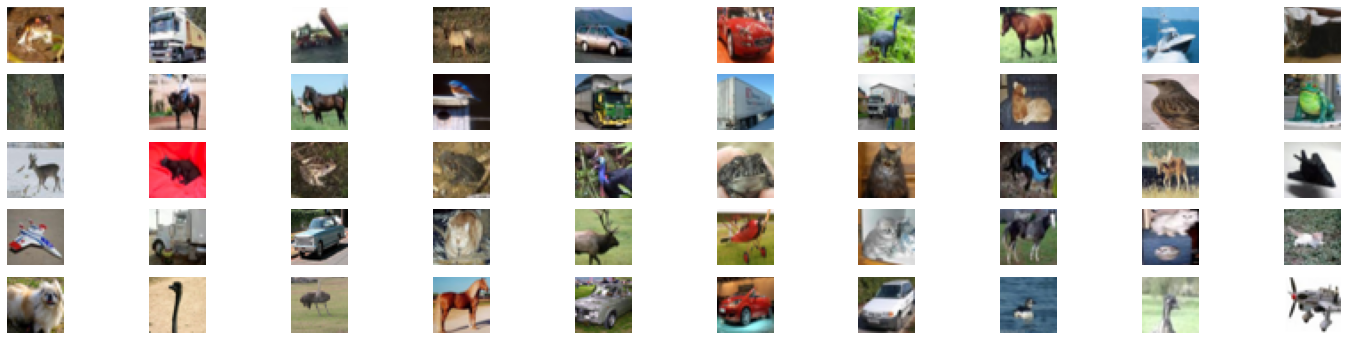

In [8]:
plt.figure(figsize=(25, 6))
for i in range(50):
  plt.subplot(5, 10, i+1)
  plt.axis('off')
  plt.imshow(X_train[i])

plt.show()

In [9]:
letent_dimension=100

In [10]:
dis=discriminator(conditional_gan=False)
print(dis.summary())

As no conditional gan, n_classes are ignored

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d (Conv2D)             (None, 16, 16, 128)       3584      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 16, 16, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 128)         147584    
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 128)         0         
                                                                 
 flatten (Flatten)           (None, 8192)              0         
                                                                 
 dropout (Dropo

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [11]:
gen=generator(latent_dim=letent_dimension, conditional_gan=False)
print(gen.summary())

As no conditional gan, n_classes are ignored

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_1 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 128)       0         
             

In [12]:
gan_model=define_gan(gen=gen, dis=dis, conditional_gan=False)
print(gan_model.summary())

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 100)]             0         
                                                                 
 dense_1 (Dense)             (None, 8192)              827392    
                                                                 
 leaky_re_lu_2 (LeakyReLU)   (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 8, 8, 128)         0         
                                                                 
 conv2d_transpose (Conv2DTra  (None, 16, 16, 128)      262272    
 nspose)                                                         
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 16, 16, 128)       0         
                                                           

In [13]:
dataset=load_real_samples(conditional_gan=False)

In [14]:
train(gen, dis, gan_model, dataset, letent_dimension, 30, 128, False, '/content/gdrive/MyDrive/GAN/cifar10_generator.h5')

Streaming output truncated to the last 5000 lines.
Epoch>18, Batch 70/390, dl_r=0.715, da_r=0.547, dl_f=0.695, da_f=0.531, gl=0.776
Epoch>18, Batch 71/390, dl_r=0.708, da_r=0.469, dl_f=0.677, da_f=0.562, gl=0.721
Epoch>18, Batch 72/390, dl_r=0.687, da_r=0.500, dl_f=0.707, da_f=0.531, gl=0.692
Epoch>18, Batch 73/390, dl_r=0.706, da_r=0.469, dl_f=0.726, da_f=0.359, gl=0.713
Epoch>18, Batch 74/390, dl_r=0.692, da_r=0.531, dl_f=0.732, da_f=0.359, gl=0.715
Epoch>18, Batch 75/390, dl_r=0.703, da_r=0.422, dl_f=0.764, da_f=0.219, gl=0.707
Epoch>18, Batch 76/390, dl_r=0.711, da_r=0.516, dl_f=0.709, da_f=0.422, gl=0.727
Epoch>18, Batch 77/390, dl_r=0.726, da_r=0.406, dl_f=0.715, da_f=0.438, gl=0.731
Epoch>18, Batch 78/390, dl_r=0.721, da_r=0.406, dl_f=0.723, da_f=0.453, gl=0.734
Epoch>18, Batch 79/390, dl_r=0.716, da_r=0.406, dl_f=0.682, da_f=0.625, gl=0.743
Epoch>18, Batch 80/390, dl_r=0.729, da_r=0.312, dl_f=0.704, da_f=0.516, gl=0.731
Epoch>18, Batch 81/390, dl_r=0.750, da_r=0.344, dl_f=0.696

Epoch>30, Batch 390/390, dl_r=0.677, da_r=0.578, dl_f=0.733, da_f=0.250, gl=0.689


In [15]:
def show_plot(examples, n):
  plt.figure(figsize=(25, 6))
  for i in range(n * n):
    plt.subplot(n, n, 1+i)
    plt.axis('off')
    plt.imshow(examples[i, :, :, :])
  plt.show()

In [16]:
from keras.models import load_model

In [17]:
model=load_model('/content/gdrive/MyDrive/GAN/cifar10_generator.h5')

In [18]:
latent_points=generate_latent_points(100, 36, conditional_gan=False)

In [19]:
X=model.predict(latent_points)

In [20]:
X=(X+1) / 2.0

In [21]:
X=(X*255).astype(np.uint8)

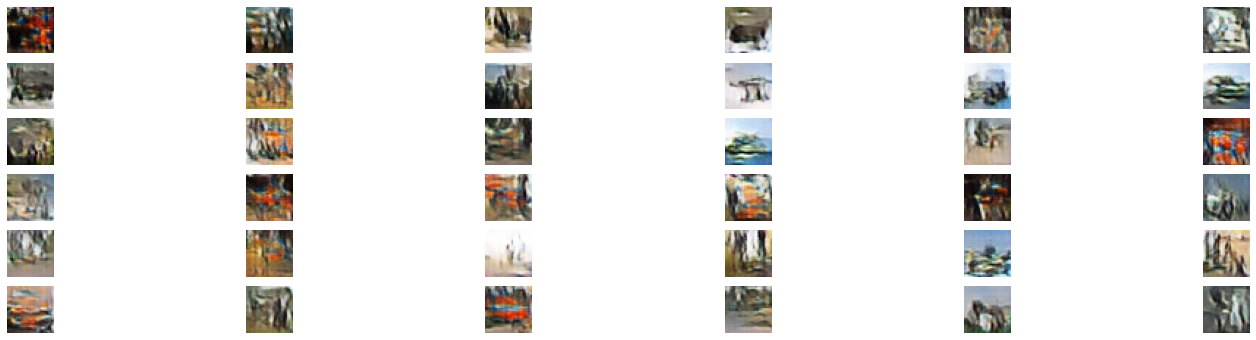

In [22]:
show_plot(X, 6)